<a href="https://colab.research.google.com/github/ruiqi-rachel-wang/MachineLearning-class/blob/main/FML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning (CSCI-UA.473)

### Homework 1: Linear Models
#### Due: October 2nd, 2023 at 11:59PM


#### Name: Ruiqi Wang
#### Email: rw2799@nyu.edu

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [ ]:
import pandas as pd

# Load the entire dataset from the CSV file
data = pd.read_csv('/content/FML2023_HW1_Dataset.csv')

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
feature_names = X.columns.tolist()

### Question 1: Data Visualization (15 points)
**Task 1.1 (5 points):** Create a scatter plot to visualize the relationship between BMI (Body Mass Index) and disease Z progression.

* Analyze the scatter plot and describe whether there appears to be a positive or negative correlation, or if no clear correlation is evident.
* Can we confidently infer a person's disease Z status using BMI as the only input variable? Explain your reasoning and any potential caveats.

there seems to be a weak positive correlation
No. There are other inputs and bmi doesn't have a strong correlation. 
 Only BMI will lead to inaccurate predictions, false positives, and false negatives. Considering multiple relevant features is necessary


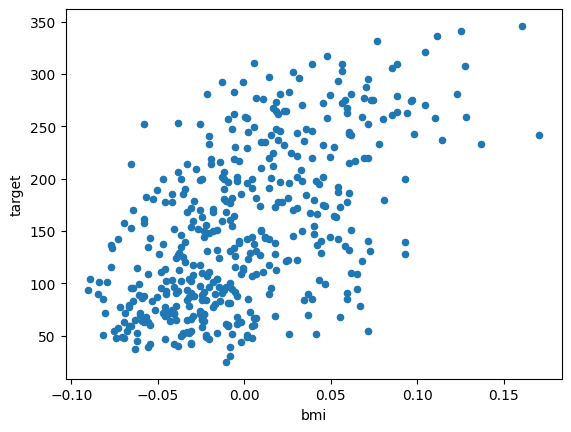

In [ ]:
# Add code here
data.plot.scatter(x='bmi',y='target')
print("there seems to be a weak positive correlation")
print("No. There are other inputs and bmi doesn't have a strong correlation. \n Only BMI will lead to inaccurate predictions, false positives, and false negatives. Considering multiple relevant features is necessary")

**Task 1.2 (5 points):** Create a histogram to visualize the distribution of age among Z patients.

* Does the histogram reveal any noticeable peaks, clusters, or trends?

It shows a slightly left-skewed distribution with noticeable peaks from age -0.09 to 0.04


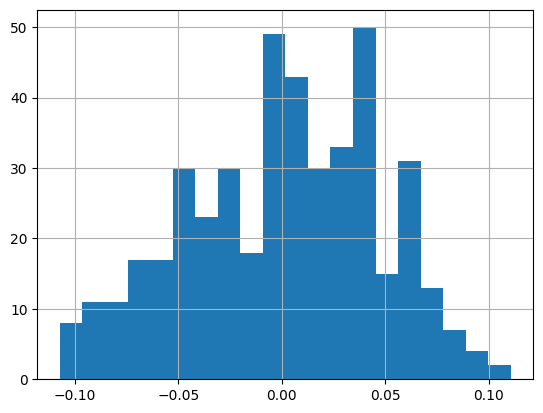

In [ ]:
# Add code here
data['age'].hist(bins=20)
print("It shows a slightly left-skewed distribution with noticeable peaks from age -0.09 to 0.04")

**Task 1.3 (5 points):** The box plot is a graphical representation that allows you to visually assess the distribution of values and identify potential differences between the two groups. If you're unfamiliar with box plots or need further guidance, you can refer to this [resource](https://www.data-to-viz.com/caveat/boxplot.html) on box plots for a detailed explanation and examples.

Construct a box plot to compare the progression of Z in male and female patients. How does the progression differ between males and females, as revealed by the box plot?

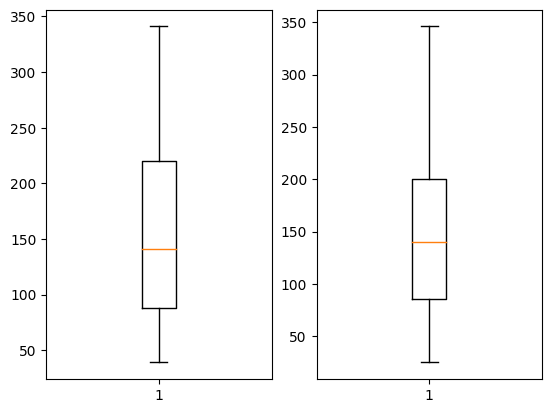

the progression of Z of one gender is more concentrated than the other, showing as a shorter box.


In [ ]:
# Add code here
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.boxplot(data[data['sex'] == 0.0506801187398186]['target'])
plt.subplot(1, 2, 2)
plt.boxplot(data[data['sex'] == -0.0446416365069891]['target'])
plt.show()
print("the progression of Z of one gender is more concentrated than the other, showing as a shorter box.")

### Question 2: Linear, Ridge, and Lasso Regression (8 points)

**Task 2.1 (2 points):** Split the dataset into training and testing sets (80/20\%) split.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 2.2 (2 points):** Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [ ]:
# Add code for linear regression, you can use machine learning libraries.
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

**Task 2.3 (2 points) :** Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.

In [ ]:
# Add code for ridge regression, you can use machine learning libraries.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

Ridge()

**Task 2.4 (2 points):** Lasso Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [ ]:
# Add code for lasso regression, you can use machine learning libraries.
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=1.0)
lasso.fit(X,y)

Lasso()

### Question 3: Model Analysis (15 points)

**Task 3.1 (5 points):** Visualize the coefficients of the Linear, Ridge, and Lasso models.
- What will be the impact of increase in the strength of s1 in linear regression?
- Among the three models, which one exhibits a more pronounced reliance on the BMI feature?

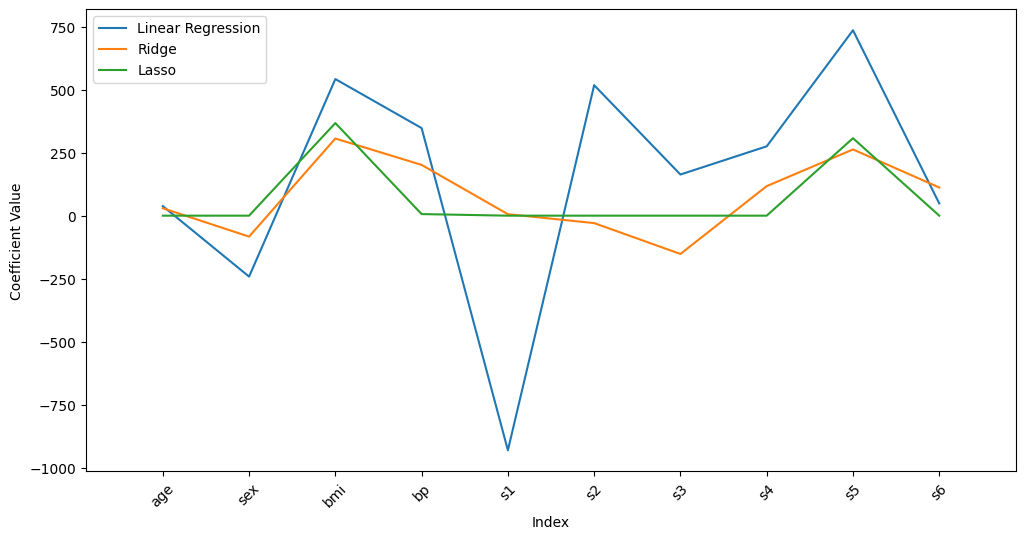

It will affect the prediction largely, the prediction may be much smaller, because s1 coefficient is negative and has a large absolute value
Linear Regression because it has the largest absolute value


In [ ]:
## Add code here
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(linear.coef_, label='Linear Regression')
plt.plot(ridge.coef_, label='Ridge')
plt.plot(lasso.coef_, label='Lasso')
plt.bar(X.columns,height=0)
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("It will affect the prediction largely, the prediction may be much smaller, because s1 coefficient is negative and has a large absolute value")
print("Linear Regression because it has the largest absolute value")

**Task 3.2 (5 points):** Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data. Compare the cross validation scores between Linear, Ridge, and Lasso regression models using a bar plot.

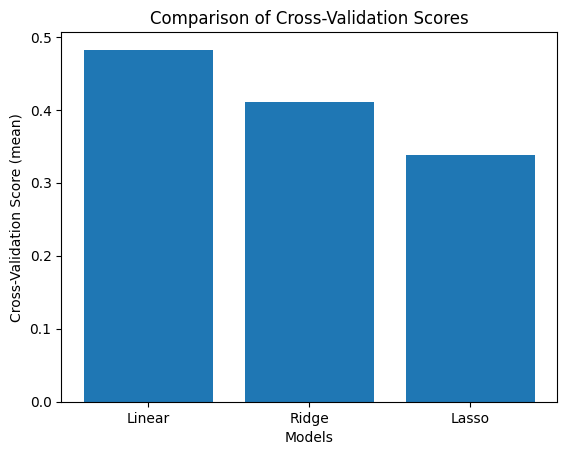

In [ ]:
## Add code here
from sklearn.model_selection import cross_val_score

la = linear_model.Lasso(alpha=1.0)
r = Ridge(alpha=1.0)
li = LinearRegression()

linear_scores = cross_val_score(li, X, y, cv=5)
ridge_scores = cross_val_score(r, X, y, cv=5)
lasso_scores = cross_val_score(la, X, y, cv=5)
models = ['Linear', 'Ridge', 'Lasso']
scores = [linear_scores.mean(), ridge_scores.mean(), lasso_scores.mean()]

plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Cross-Validation Score (mean)')
plt.title('Comparison of Cross-Validation Scores')
plt.show()

**Task 3.3 (5 points):** Conduct a grid search for both Lasso and Ridge regression models, and then visualize the differences in results obtained before and after the grid search using a bar plot.
- What are the obtained regularization strength parameters for both models?
- Did the grid search improve model performance?

Lasso(alpha=0.1)
Ridge(alpha=0.1)


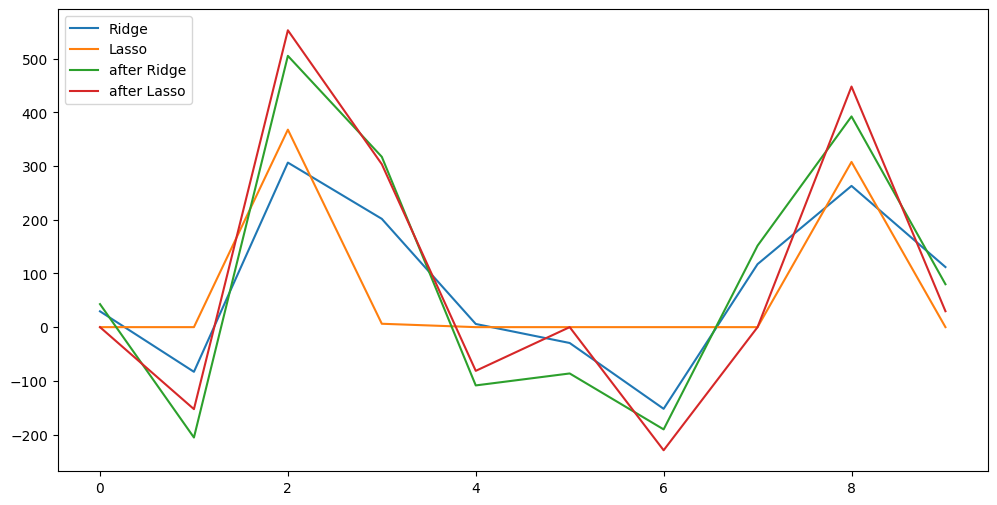

The obtained regularization strength parameters (best alpha values) for both Lasso and Ridge models are 0.1.
Mean Squared Error Before: Lasso: 3385.0367587295286 Ridge:2996.858628430577
 After: Lasso: 2798.1934851697197 Ridge:2856.4868876706537
Mean squared errors of both models decreases after the grid search, so it indicates an improvement in model performance.


In [ ]:
## Add code here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parameter = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid_search = GridSearchCV(la, parameter, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search = GridSearchCV(r, parameter, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train,y_train)
ridge_grid_search.fit(X_train,y_train)

print(lasso_grid_search.best_estimator_)
print(ridge_grid_search.best_estimator_)

lasso_mse_before = mean_squared_error(y_test, lasso.predict(X_test))
ridge_mse_before = mean_squared_error(y_test, ridge.predict(X_test))
lasso_mse_after = mean_squared_error(y_test, lasso_grid_search.best_estimator_.predict(X_test))
ridge_mse_after = mean_squared_error(y_test, ridge_grid_search.best_estimator_.predict(X_test))

plt.figure(figsize=(12, 6))
plt.plot(ridge.coef_, label='Ridge')
plt.plot(lasso.coef_, label='Lasso')
plt.plot(ridge_grid_search.best_estimator_.coef_, label='after Ridge')
plt.plot(lasso_grid_search.best_estimator_.coef_, label='after Lasso')
plt.legend()
plt.show()


print("The obtained regularization strength parameters (best alpha values) for both Lasso and Ridge models are 0.1.")
print(f"Mean Squared Error Before: Lasso: {lasso_mse_before} Ridge:{ridge_mse_before}\n After: Lasso: {lasso_mse_after} Ridge:{ridge_mse_after}" )
print("Mean squared errors of both models decreases after the grid search, so it indicates an improvement in model performance.")

### Question 4: Bias and Variance Tradeoff (12 points)

**Task 4.1 (5 points)** Describe the bias-variance tradeoff, how it affects model performance, and explain the relationship between model complexity and bias/variance. Use markdown cells for explanation.

**Task 4.2 (7 points):** Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 1 to 8 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, fit regression models of to the transformed dataset. Then, create line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. Compare the errors between these models.


# answer

4.1: bias-variance tradeoff is when we try to balances two types of errors: bias and variance in machine learning.

Bias is the error from overly simplistic assumptions in a model. High bias can lead to underfitting.Variance(kind of the opposite) is the error from model complexity. High variance can lead to overfitting.

Underfitting (high bias) results in poor training and testing performance.
Overfitting (high variance) fits training data too closely, leading to good training but poor testing performance.
We want to find a balance that fit well to new data. This balance depends on this model complexity.

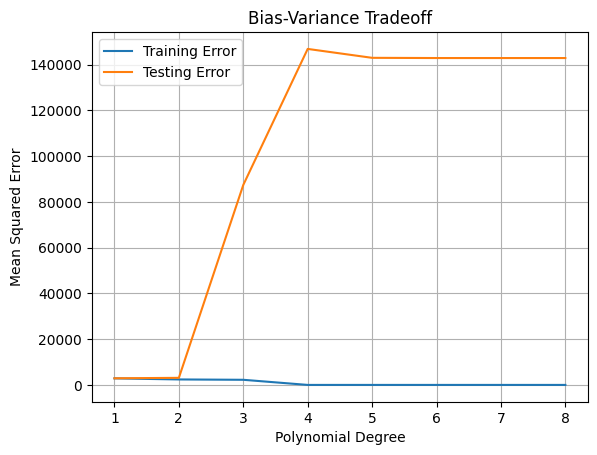

In [ ]:
### Add code here

from sklearn.preprocessing import PolynomialFeatures
import numpy as np
degrees = np.arange(1, 9)
train_error = np.zeros(8)
test_error = np.zeros(8)

for i, d in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=d)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_error[i] = mean_squared_error(y_train, y_train_pred)
    test_error[i] = mean_squared_error(y_test, y_test_pred)

# Plot the bias-variance tradeoff
plt.plot(degrees, train_error, label='Training Error')
plt.plot(degrees, test_error, label='Testing Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid()
plt.show()

#### Z dataset (Classification)

For the last question, we will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [ ]:
from sklearn.utils import shuffle
# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Question 5: Logistic Regression from Scratch (20 points)


**Task 5.1 (2 points):** Implement the sigmoid function.    
**Task 5.2 (7 points):** Initialize the weights and biases to zeros and implement gradient descent.   
**Task 5.3 (6 points):** Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        ### Implement the sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        ### Initialize the weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            ### Implement gradient descent
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        ### Implement the predict function
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y = [1 if i > 0.5 else 0 for i in y_predicted]
        return y

    def predict_proba(self, X):
        ### Implement the predict_proba function
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted

    def get_params(self, deep=True):
        return {
            "learning_rate": self.learning_rate,
            "num_iterations": self.num_iterations
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

**Task 5.4 (5 points):** Create an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, calculate the accuracy, precision, recall, and F1 score (you can use available machine learning libraries).

In [ ]:
### Add code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(accuracy, precision, recall, f1)

0.5730337078651685 0.6711812936532038 0.5730337078651685 0.5217407606454113
